# Clasificación de setas

Clasificación de 23 especies distintas en venenosas ("p" de poisonous) y comestibles ("e" de edible").

Tenéis que crear un Jupyter Notebook y realizar el proyecto en el mismo. Para ello, deberéis utilizar el dataset que os llegó al correo.

Realizar un análisis del dataset y tenéis que redactar las conclusiones que habéis obtenido de análisis exploratorio.

Para ello, podéis basaros en los dos notebooks que utilizastéis en el laboratorio y la siguiente guía.

## Guía

*No es necesario cubrir todos estos conceptos en todos los datasets, pero conviene tenerlos en mente. Puede que algunos conceptos no se puedan aplicar con todos los tipos de datos. Aparte de estos conceptos básicos, es importante intentar encontrar patrones en este primer análisis.

1. En primer lugar, hay que tener en cuenta que existen objetivos generales y específicos para la comprensión de los datos. Una parte importante de la comprensión de los datos es hacerse una idea de la calidad de los datos. Hay problemas de calidad de datos como la precisión sintáctica que son fáciles de comprobar.

2. Los valores atípicos son otro problema, y existen varios métodos para apoyar la identificación de valores atípicos. Aparte de los métodos diseñados exclusivamente para la detección de valores atípicos, podéis utilizar técnicas de visualización como boxplots, histogramas, diagramas de dispersión (o proyecciones basadas en PCA) que pueden ayudar a encontrar valores atípicos pero que también son útiles para otros propósitos.

3. Los valores faltantes son otra preocupación de la calidad de los datos. Cuando hay faltas explícitas es decir, las entradas que están marcadas directamente como faltantes, se debería tratar de averiguar de qué tipo son. Esto puede requerir conocimiento del dominio o se podrían deducir sin ese conocimiento. También debemos ser conscientes de que pueden existir valores atípicos que no estén marcados explicitamente. El caso más simple puede ser el de los valores atípicos que tienen un valor por defecto. Los histogramas podrían ayudar a identificar estos valores. No existe un técnica estándar para identificarlos.

4. Aparte de estos problemas de calidad de los datos, la comprensión de los datos también debería ayudar a descubrir nuevas o confirmar las dependencias o correlaciones esperadas entre atributos. Las gráficas de dispersión y el resto de técnicas vistas en clase pueden mostrar correlaciones entre pares de atributos.

5. Supuestos específicos dependientes de la aplicación - por ejemplo, la suposición de que un atributo específico sigue una distribución normal - también debe ser verificado durante la comprensión de los datos.

6. La representación de los datos no siempre puede comprobarse únicamente sobre la base de los datos, tenemos que comparar las estadísticas con nuestras expectativas. Si sospechamos que hay un cambio en un atributo numérico con el tiempo, podemos omparar los histogramas o boxplots para diferentes períodos de tiempo. Podemos hacer lo mismo con los gráficos de barras para atributos categóricos

7. Comprueba las distribuciones de cada atributo si son inusuales o inesperadas. Propiedades como los valores atípicos. ¿Son correctos los dominios o rangos? ¿Las medianas de los atributos numéricos son correctos? Esto debe hacerse sobre la base de histogramas y gráficos de caja para atributos continuos y gráficos de barras para atributos categóricos.

8. Comprobar correlaciones o dependencias entre pares de atributos con gráficos de dispersión. Para un pequeño número de atributos, inspeccionar gráficas de dispersión para todos los pares de atributos. Para un mayor número de atributos no hace falta generar gráficas para todos los pares, sino sólo para aquellos en los que se espera una dependencia o independencia específica.Además se pueden generar gráficas de dispersión para parejas elegidas al azar.

9. Aparte de estos puntos, en un problema de clasificación tendríamos que revisar que los datos estén balanceados. ¿Existe la misma cantidad de datos para todas las clases? 

Recordad que estos puntos son solo orientativos. La visualización y el análisis descriptivo serán distintos para cada problema y cada problema tendrá sus particularidades. Vuestro trabajo será obtener conclusiones y patrones de este primer análisis.

Una vez obtenidas las primeras conclusiones, quizás podráis desprenderos de variables innecesarias o crear nuevas variables basándoos en las variables iniciales.





## 1. Revisión de los datos originales

Clasificación de 23 especies distintas en venenosas ("p" de poisonous) y comestibles ("e" de edible"). Por lo tanto, se trata de un problema de clasificación.

Todos los valores de entrada son categóricos.
La salida es binaria, solo hay 2 valores posibles, "p" o "e".

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file = "mushrooms.csv"

data = pd.read_csv(file, index_col=0)

## 2. Dimension del dataset


In [2]:
data.shape

(8124, 24)

## 3. Tipos de datos de los atributos del dataset


In [3]:
data.dtypes

stalk-color-below-ring      object
stalk-shape                 object
veil-type                   object
gill-spacing                object
class                       object
spore-print-color           object
stalk-surface-below-ring    object
ring-number                 object
cap-shape                   object
gill-attachment             object
ring-type                   object
bruises                     object
stalk-root                  object
stalk-surface-above-ring    object
gill-color                  object
stalk-color-above-ring      object
habitat                     object
population                  object
cap-surface                 object
veil-color                  object
cap-color                   object
odor                        object
gill-size                   object
d-var                       object
dtype: object

## 4. Distribución de las instancias de las clases del dataset

Podemos ver que hay un buen balanceo de las clases.

In [4]:
count_class = data.groupby("class").size()
count_class

class
e    4208
p    3916
dtype: int64

## 5. Análisis descriptivo

Dibujamos los histogramas para cada feature. 
- Observamos la frecuencia de las variables.
- Observamos si hay algun valor atípico. 

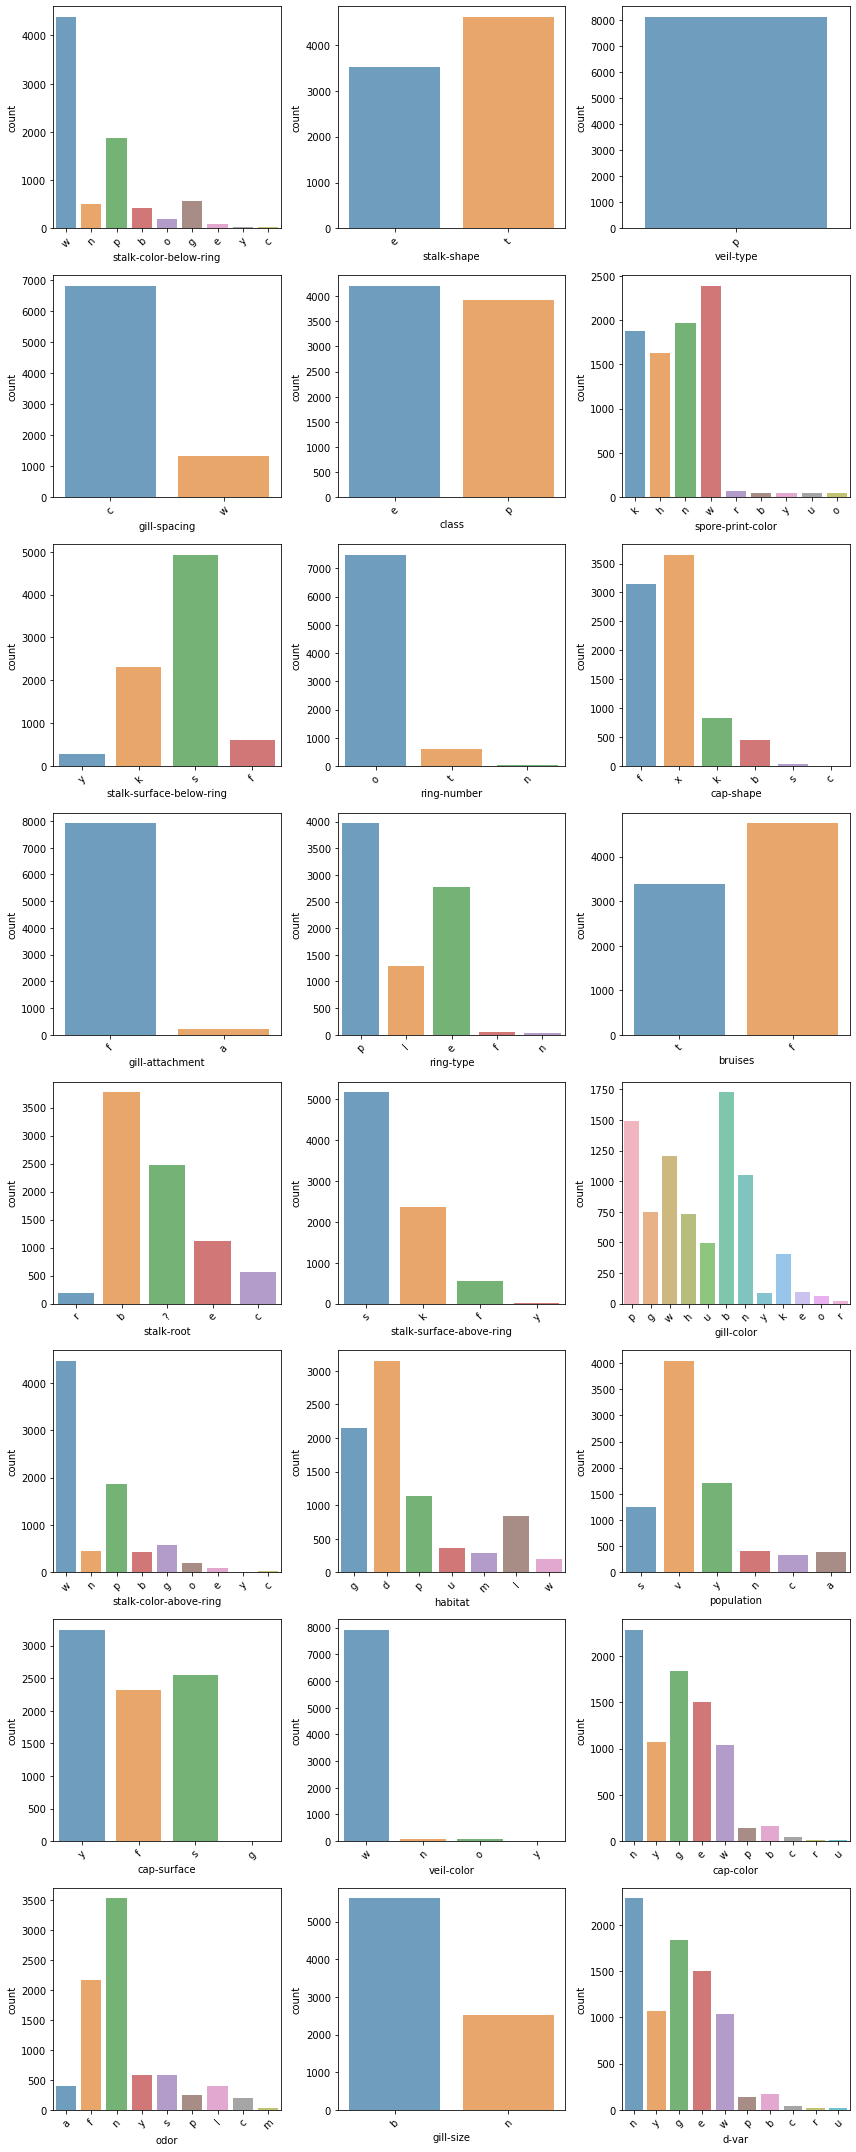

In [5]:
# Dibujamos las histogramas para cada feature.
fig, axes = plt.subplots(round(len(data.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data.columns[i], alpha=0.7, data=data, ax=ax)
fig.tight_layout()  
    

Observando la frecuencia de las variables en los histogramas, podemos ver que algunas categorías son predominantes.
Estas columnas están muy desbalanceadas, predominando un valor respecto a las demas. 
Procemos a borrar las siguientes columnas:
- veil-type
- ring-number
- gill-attachment
- veil-color

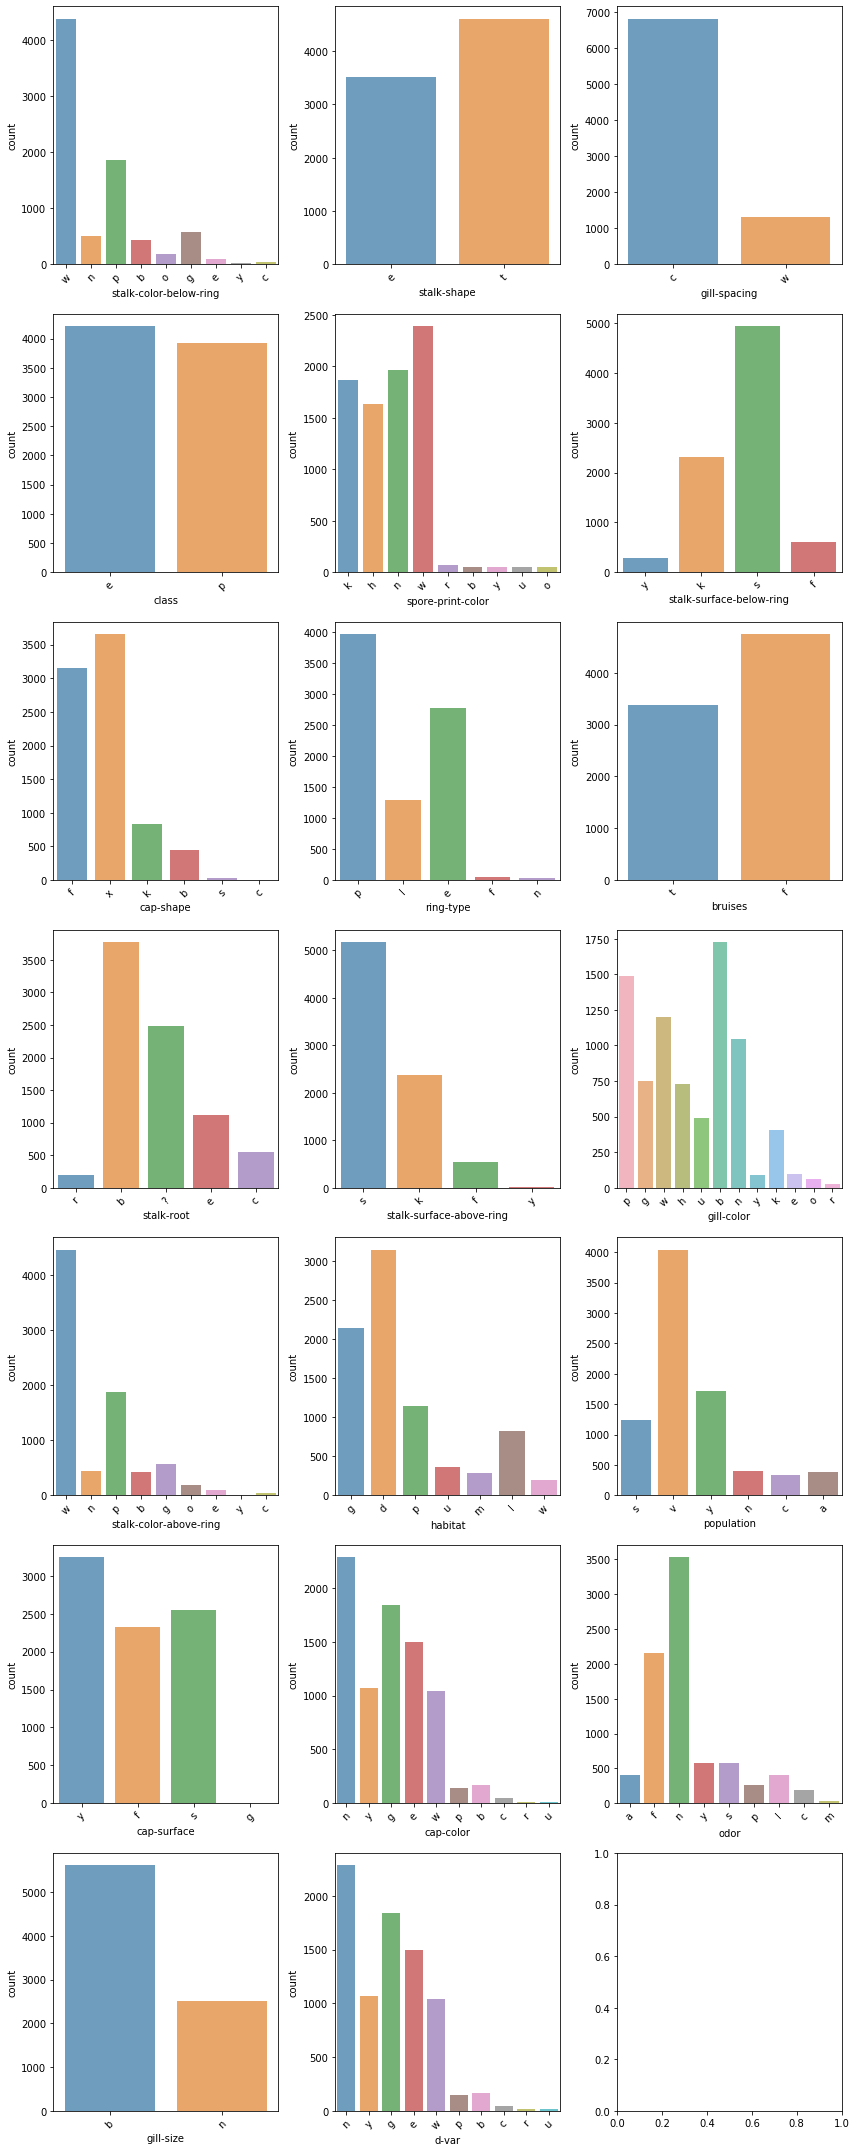

In [6]:
# Borramos las columnas que tengan valores predominantes.
del_columns = ['veil-type', 'ring-number', 'gill-attachment', 'veil-color']

for col_name in del_columns:   
    if col_name in data:
        data.drop(col_name, axis=1, inplace=True)  
        
fig, axes = plt.subplots(round(len(data.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data.columns[i], alpha=0.7, data=data, ax=ax)
fig.tight_layout()  

In [7]:
data.shape

(8124, 20)

En los histogramas podemos observar que en la columna stalk-root tenemos alrededor de 2500 valores con el valor '?'.
Procedemos a borrar las filas que tengan este valor no válido.

In [8]:
# Procedemos a borrar las filas que tengan este valor.
for index, row in data.iterrows():
    if '?' in row.values:
        data.drop(index, axis=0, inplace=True)  
data.shape

(5644, 20)

Ahora intentaremos sacar patrones o relaciones (si las hay) entre las features y la clase.
Para ello, dividiremos el dataset en 2 partes:
    - Por un lado las features (df_features). Las convertimos en numéricas con LabelEncoder.
    - Por otro lado la clase (df_class). La dejamos como categórica. 

In [9]:
# Guardo las features en una variable y las paso a numéricas.
# Features
df_features = data.drop("class", axis=1)
df_features = df_features.apply(LabelEncoder().fit_transform)

# Guardo la columna clase como categórica.
# Class
df_class = data["class"]

Ahora intentaremos buscar la relacion que hay entre una feature y la clase.
Selecionamos la feature 'gill-color' que lo hemos convertido anteriormente a numérica y lo visualizamos junto con la clase un boxplot. 

Podemos sacar las siguientes conclusiones:
- Si el 'gill-color' tiene un valor entre el 1 y el 3, podemos considerar que la seta es venenosa.
- Si el 'gill-color' tiene un valor entre el 4 y el 6, podemos considerar que la seta no es venenosa.
- Si el 'gill-color' tiene un valor entre el 3 y el 4, la seta puede ser venenosa o no. Podemos decir que dentro de este rango, la decision de si la seta es venenosa o no es influenciada por otras variables.

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

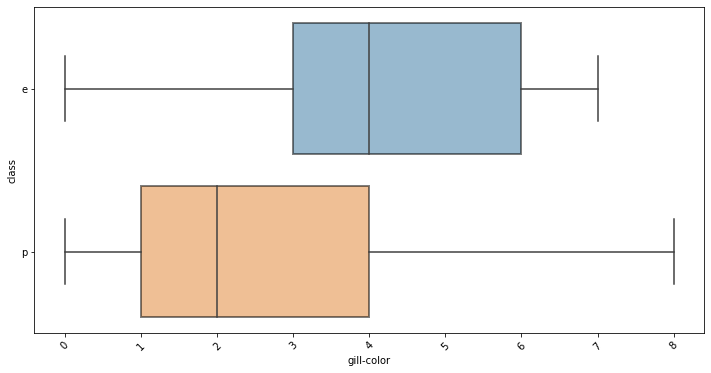

In [10]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x=df_features["gill-color"], y=df_class)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Ahora dibujamos el boxplot para relacionar la feature 'd-var' con la clase.
Conclusiones:
    - Si el 'd-var' tiene un valor entre el 6 y el 7, podemos considerar que la seta es venenosa. 
    - Si el 'd-var' tiene un valor entre el 3 y el 6, la seta puede ser venenosa o no. 

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text xticklabel objects>)

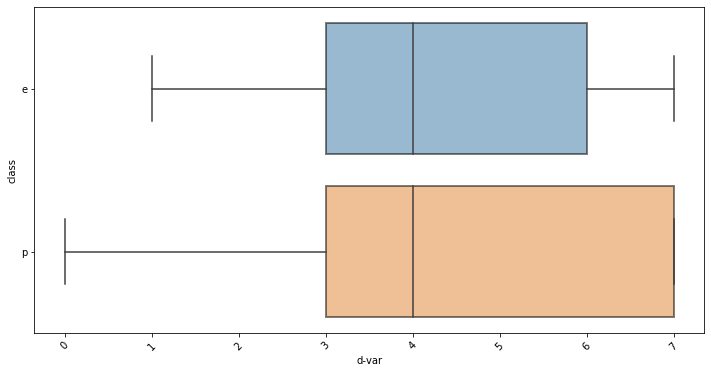

In [11]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x=df_features["d-var"], y=df_class)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)